In [1]:
% matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing


# Import Tensorflow libraries
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Import churn data
data= pd.read_csv("C:/Users/Desmond Gukwe/Google Drive/Python Scripts/winequality/winequality/Churn_raw.csv"  )

data.head()

,id,year,month_of_year,account_id,balance,days_since_last_deposit,time_in_our_system,variable_saas_ratio,payout_gt_10000_lm,yield_rate,...,has_gt_2_conversion_ats,saas_churned_next_three_months,yellow_flag,red_flag,retrospectively_churned_next_three_months,retrospective_SAAS_current_month,retrospective_SAAS_next_month,retrospective_SAAS_2_after,retrospective_SAAS_3_after,doe
0,30961,2016,1,10047,2381.51,6,2326,0.0000,1,0.0633,...,1,0,0,0,0,0.0,0.0,0.0,0.0,2017/08/22 03:00
1,30962,2016,1,10063,0.00,0,2299,0.0000,0,3.9151,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2017/08/22 03:00
2,30963,2016,1,10211,8548.06,7,2181,0.0000,0,0.1067,...,1,0,0,0,0,0.0,0.0,0.0,0.0,2017/08/22 03:00
3,30964,2016,1,10424,1787.96,48,2073,0.0000,1,0.0336,...,1,0,0,0,0,0.0,0.0,0.0,0.0,2017/08/22 03:00
4,30965,2016,1,10475,100000.00,28,2051,0.8333,1,0.0460,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2017/08/22 03:00


In [4]:
data=data.drop(['id','year','account_id','yellow_flag', 'red_flag', 'retrospectively_churned_next_three_months', 'retrospective_SAAS_next_month', 'retrospective_SAAS_2_after', 'retrospective_SAAS_3_after', 'retrospective_SAAS_current_month','doe'],axis =1)
feat_labels =data.columns

feat_labels

Index(['month_of_year', 'balance', 'days_since_last_deposit',
       'time_in_our_system', 'variable_saas_ratio', 'payout_gt_10000_lm',
       'yield_rate', 'saas_increased_LM', 'saas_decreased_LM',
       'variable_increased', 'variable_decreased',
       'negative_balance_under_three_saas_payments', 'has_a_custom_report',
       'has_5plus_custom_reports', 'has_a_scheduled_report',
       'has_3plus_scheduled_reports', 'has_4plus_users', 'has_a_csm',
       'has_a_login_LM', 'has_11plus_logins_LM', 'has_a_gt_one_user_login_LM',
       'has_gt_5_report_runs_LM', 'has_gt_200_report_runs_LM',
       'has_gt_100_active_mps_LM', 'has_gt_30000_clicks_LM',
       'has_gt_300_actions_LM', 'active_mps_decrease_3_months',
       'clicks_decrease_3_months', 'actions_decrease_3_months',
       'has_analytic_at', 'has_call_at', 'has_click_at', 'has_mobile_at',
       'has_gt_2_conversion_ats', 'saas_churned_next_three_months'],
      dtype='object')

In [5]:
# Select features and targets
# select targets
y = data.saas_churned_next_three_months

# Select features
X = data.drop('saas_churned_next_three_months',axis=1)


In [6]:
# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)

# Convert to numpy array
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

# make targets categorical
y_train = np_utils.to_categorical(y_train)

C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [10]:
# Initialize the neural network
model = Sequential()
model.add(Dense(34, input_dim=34, kernel_initializer="uniform",activation="relu"))
model.add(Dense(6, kernel_initializer="uniform",activation='relu'))
model.add(Dense(4, kernel_initializer="uniform",activation='relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

adam = keras.optimizers.Adam(lr=0.001)
batchsize = 8

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=adam,metrics=['accuracy'])

# train the model

history = model.fit(X_train, y_train, epochs=25,validation_split=0.3, batch_size=batchsize,verbose=1)


# Classification performance on test data

y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Train on 43365 samples, validate on 18586 samples
Epoch 1/25
43365/43365 [==============================] - 10s 232us/step - loss: 0.2988 - acc: 0.9164 - val_loss: 0.2900 - val_acc: 0.9154
Epoch 2/25
43365/43365 [==============================] - 10s 231us/step - loss: 0.2875 - acc: 0.9169 - val_loss: 0.2859 - val_acc: 0.9154
Epoch 3/25
43365/43365 [==============================] - 9s 215us/step - loss: 0.2844 - acc: 0.9169 - val_loss: 0.2855 - val_acc: 0.9154
Epoch 4/25
43365/43365 [==============================] - 10s 229us/step - loss: 0.2852 - acc: 0.9170 - val_loss: 0.2880 - val_acc: 0.9154
Epoch 5/25
43365/43365 [==============================] - 9s 219us/step - loss: 0.2884 - acc: 0.9169 - val_loss: 0.2877 - val_acc: 0.9154
Epoch 6/25
43365/43365 [==============================] - 10s 228us/step - loss: 0.2932 - acc: 0.9169 - val_loss: 0.2875 - val_acc: 0.9154
Epoch 7/25
43365/43365 [==============================] - 10s 227us/step - loss: 0.2815 - acc: 0.9169 - val_loss: 0.28

C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


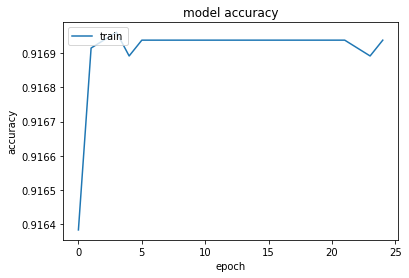

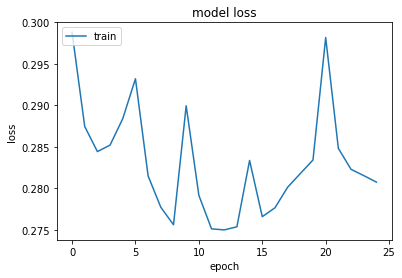

In [11]:
# Plot history

# Accuray 
plt.plot(history.history['acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()